# Bag of Words Yelp Sentiment Analysis Project

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import json

from collections import Counter



## 1. Exploring the data set
Here we explore the yelp dataset review. We use a dataset with Yelp reviews and a 1-5 star rating associated with it to learn how to use the bag of words model to conduct sentiment analysis.

In [3]:
df = pd.read_csv('yelp_academic_dataset_review.csv') 

We simply grab all the one star and five star data from the dataset here. 

In [7]:
# Get one star reviews and label them with -1
dfOnes = df[df['stars'] == 1]
dfOnes = dfOnes.head(10000)
dfOnes['stars'] = dfOnes['stars'].apply(lambda x: -1)

# Get five star reviews and label them with 1
print("Shape of the ones input: ")
print(dfOnes.shape)
dfFives = df[df['stars'] == 5]
dfFives = dfFives.head(10000)
dfFives['stars'] = dfFives['stars'].apply(lambda x: 1)

print("Shape of the fives input: ")
print(dfFives.shape)
dfCombined = pd.concat([dfOnes, dfFives], axis=0)
dfCombined = dfCombined.sample(frac=1)

dfTrainset = dfCombined.head(int(len(dfCombined.index) * .8))
dfTestset = dfCombined.tail(int(len(dfCombined.index) * .2))

trainX = np.asarray(dfTrainset['text'])
trainY = np.asarray(dfTrainset['stars'])

testX = np.asarray(dfTestset['text'])
testY = np.asarray(dfTestset['stars'])

print('Data Frame of reviews:')
dfCombined

Shape of the ones input: 
(10000, 9)
Shape of the fives input: 
(10000, 9)
Data Frame of reviews:


,business_id,cool,date,funny,review_id,stars,text,useful,user_id
4428,IhNASEZ3XnBHmuuVnWdIwA,1,2017-03-27 06:50:00,0,2-ZMoSug-pL7unD5u2EwdA,1,Love this tea bar! You HAVE to try their iced ...,0,xTxzruMecRRb2hMQ6QzuMA
27667,1jPLv-vyjPSvtl2ntSfdgA,0,2015-05-13 14:45:04,0,_H69rwEWQMY8jxhGHiDtVw,-1,Very unprofessional!!!! Charged be $650.00 fo...,2,rm72k7hmPx3C2x7NF45KlQ
18012,gE_ez1graX93gASNsttgUg,0,2016-10-27 18:53:52,0,pY2iahDsorXonyILcaHVmQ,1,Fantastic service! I was in town for a weddin...,1,irJKUrPxs5Z5fTvya-JVyA
6186,GwcfhhBoAUT-kJQpDjsHxQ,0,2017-05-26 01:58:23,0,9rlrMOfKUznLPhyBHFvbLw,-1,"Workers are not friendly, rude and lazy. They...",0,5wKlVEkZMYmPy6e9p9kPpA
42765,tM_MMrMFwf5rJv9rbu4NQQ,0,2014-04-02 01:49:51,0,XDlOnf3SRz4UElr3C4tMbw,-1,This is actually a nice location with lots of ...,1,kR-sICS5zHap_0sic6GtTQ
...,...,...,...,...,...,...,...,...,...
54437,vYKZHWBuBT1PUevggLAE9w,0,2017-01-03 01:21:54,0,qO6mORLcXF6x2a0rOJ7-NA,-1,Bad customer service ever i never see ... Juli...,0,HDE-FpPUd4I6PL53UVsXHg
3979,viji5rHhNlsy9w-JmUhyaw,0,2016-03-06 23:39:47,0,bLuvNJ0uruIC5xZRtUkuZA,1,The service from Nick was amazing. It was my b...,0,_FBFGIcazgiM4j700y_XVg
63846,lpxj6LFir23Ds6swW8a6fg,0,2014-09-28 01:36:48,0,0skWU7rHVrhTDGXnpQ2jMQ,-1,One of the worst meals I've had in a long time...,0,BEv425u9HOYh8QlblM_6jg
3341,UCpUOtvqR-NBWBNVMzJleA,0,2015-03-18 18:18:41,0,30Jt5_OsmoHlIRgTaSQkpg,-1,We arrived for a couple of drinks after having...,1,MEvfuV0jyJ3H8Db3xw7m8A


### Part A: Review Data Sampling

Try to run the below block multiple times to see different reviews and the classification assigned to the review. Please comment below on what interesting aspects of the reviews you find to lead to certain classifications. What distinguishes between a classification of 1 and one of -1.

In [8]:
sample = dfCombined.sample() 
print("Text: " + sample['text'].values[0]  + "\n")
print("Classification: " + str(sample['stars'].values[0]))

Text: We recently stopped in to sit at the bar and have some appetizers and drinks.  The food was awesome (beef Wellington bites and chili paneer). Robbie was a great bartender. Very knowledgeable and great to talk to while sitting at the bar.

Classification: 1


#### RESPONSE: 

In [9]:
# Any meaningful answer that discusses words that are more commonly used in positive reviews vs
# negative reviews or length analysis will suffice

### Part B: Corpus Examination

We are looking of the combined string of every review in the usable dataset. In the provided space below use a histogram to visualize the frequency of the 25 most common words. Then answer the questions that follow. Hint: The most_common funtion for the counter may come in handy.

In [12]:
allText = ' '.join(dfCombined["text"])
words = allText.split() 

wordCounts = Counter()
for word in words:
    wordCounts[word] += 1


Length of all text:
11676339
Number of unique words:
101317


<BarContainer object of 25 artists>

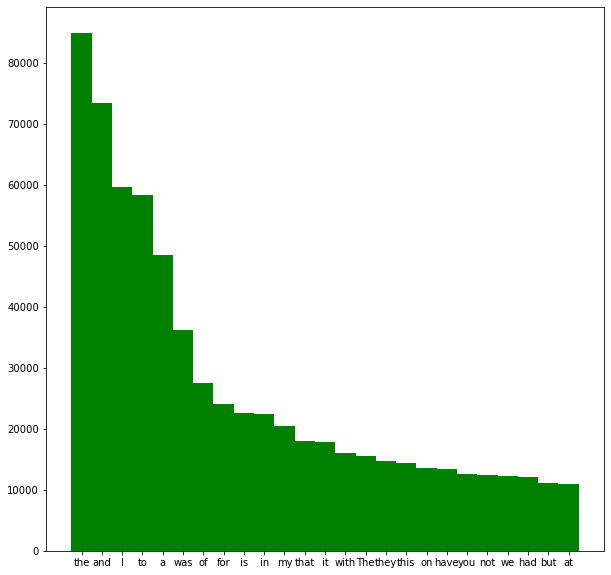

In [11]:
print("Length of all text:")
print(len(allText))
print("Number of unique words:")
print(len(wordCounts))
### Begin Part B
mostCommon = dict(wordCounts.most_common(25))

fig, ax = plt.subplots(figsize=(10,10))
ax.bar(mostCommon.keys(), mostCommon.values(), 1, color='g')
### End Part B

#### What do you notice about the most common words? Do you think they useful in classifying a review?

#### RESPONSE: 

In [14]:
# blah

Look at some of the least common words below. Define the variable least common.

In [16]:
### Begin Part B
leastCommon = dict(wordCounts.most_common()[:-10-1:-1])
### End Part B

In [17]:
print(leastCommon)

{'back...what': 1, 'cared....': 1, 'Busy..': 1, 'later...NO': 1, 'server..': 1, 'on..had': 1, 'nearby..': 1, '$200.00.': 1, '(uncommon)': 1, 'ect).': 1}


#### What do you notice about the least common words? Do you think they useful in classifying a review

#### RESPONSE: 

In [ ]:
# blah

### Part C: Identifying Unique Most Common Words of Each Classification

We now want to find the most common words in each classification set that is not included in the other. Basically, we find the most common words in five star reviews that are not in the most common set of words for one star reviews and vice versa. Fill out the below code and answer the following questions.

In [23]:
allTextFives = ' '.join(dfFives["text"])
wordsFives = allTextFives.split() 

### Begin Part C
# Find the 100 most common words that are found in the five star reviews
wordCountsFives = Counter()
for word in wordsFives:
    wordCountsFives[word] += 1
    
mostCommonFives = dict(wordCountsFives.most_common(100))
### End Part C



allTextOnes = ' '.join(dfOnes["text"])
wordsOnes = allTextOnes.split() 

### Begin Part C
# Find the 100 most common words that are found in the one star reviews
wordCountsOnes = Counter()
for word in wordsOnes:
    wordCountsOnes[word] += 1
mostCommonOnes = dict(wordCountsOnes.most_common(100))
### End Part C

### Begin Part C
# Subtract sets in order to find the most common unique words for each set
fivesUnique = { k : mostCommonFives[k] for k in set(mostCommonFives) - set(mostCommonOnes) }
onesUnique = { k : mostCommonOnes[k] for k in set(mostCommonOnes) - set(mostCommonFives) }
### End Part C

print("Most common words in one star reviews: ")
print(onesUnique)
print()
print("Most common words in five star reviews: ")
print(fivesUnique)

Most common words in one star reviews: 
{'then': 2142, 'told': 3140, 'said': 3075, 'came': 2090, 'order': 2016, 'after': 2387, 'she': 3961, 'over': 2152, 'her': 2675, 'customer': 1774, 'did': 2248, 'ordered': 1768, 'went': 2080, 'could': 2290, "don't": 2405, 'going': 1762, 'minutes': 1854, 'no': 3909, 'asked': 2314, 'who': 1849, 'never': 2886, "didn't": 2615}

Most common words in five star reviews: 
{'some': 1460, 'always': 1721, 'staff': 1198, '-': 1372, 'made': 1148, 'come': 1071, 'recommend': 1257, 'great': 3288, 'Great': 1211, 'friendly': 1167, "it's": 1247, "I've": 1590, 'has': 1425, 'can': 1671, 'definitely': 1342, "I'm": 1184, 'nice': 1136, 'also': 1553, 'love': 1544, 'than': 1038, 'best': 1774, 'really': 1749}


#### What do you notice about these words above? Are they more respresentitive of each classification? What words do you thing are good indicators of each review? What words are not so good?

#### RESPONSE: 

In [32]:
# blah

## 2. Testing different Models

### Part D: Baseline Model

To see the effect of the bag of words model, we first build a naive baseline model that tries to simply classify the model based on the length of the review. Complete the code below and answer the following questions.

In [29]:
def baseline_featurize(review):
    ### Begin Part D
    # Featurize the data based on the length of the review
    return np.asarray([len(review)])
    ### End Part D

def trainModel(X_featurized, y_true):
    ### Begin Part D
    # Return a model that uses logistic regression
    model = LogisticRegression()
    model.fit(X_featurized, y_true)
    return model
    ### End Part D

def accuracyData(model, X_featurized, y_true):
    ### Begin Part D
    # Predict the data given the model and corresponding data. Return the accuracy 
    # as the percentage of values that were correctly classified. Also print a confusion
    # matrix to help visualize the error. Hint: Look at sklearn.metrics.confusion
    y_predict = model.predict(X_featurized)
    total_num = len(y_true)
    total_correct = np.sum([1 if y_predict[i] == y_true[i] else 0 for i in range(len(y_predict))])
    total_incorrect = total_num - total_correct
    accuracy = total_correct / total_num
    print(sklearn.metrics.confusion_matrix(y_true, y_predict, labels=[-1, 1]))
    print(accuracy)
    ### End Part D
    return accuracy
    
featurized_data = np.stack(np.asarray(dfCombined["text"].apply(baseline_featurize)))
y_true = np.asarray(dfCombined["stars"])

# print(featurized_data.shape)
# print(y_true.shape)

model = LogisticRegression()

model.fit(featurized_data, y_true)
    
    

# currFeaturized_data = np.stack(np.asarray(dfTrainset["text"].apply(baseline_featurize)))
# currModel = trainModel(currFeaturized_data, np.asarray(dfTrainset["stars"]))

# testFeaturized_data = np.stack(np.asarray(dfTestset["text"].apply(baseline_featurize)))




# predictData(currModel, testFeaturized_data, np.asarray(dfTestset["stars"]))



LogisticRegression()

In [27]:
# accuracyData(model, 

array([ 1,  1, -1, ...,  1,  1, -1])

#### What did you get as your accuracy? Does that surprise you? Why or why not?

#### RESPONSE: 

In [ ]:
# Stuff

### Part E: Bag of Words Model

We now implement the bag of words model below. Please complete the following code segments and answer the following questions.

In [30]:
# We create a wordsOrdered list that contains all words in the train data that shows up more
# than one time

modifiedCounter = Counter(el for el in wordCounts.elements() if wordCounts[el] > 1)
wordsOrdered = [key for key, _ in modifiedCounter.most_common()]

def bag_of_words_featurize(review):
    ### Begin Part E
    # Code the featurization for the bag of words model. Return the corresponding vector
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter))
    for word in reviewWords:
        if word in wordsOrdered:
            vec[wordsOrdered.index(word)] += 1
    return vec
    ### End Part E        

Run the below script and see how well the bag of words model performs. Warning: this block may
around 10 minutes to run.

In [160]:
print("Beginning Train Featurization")
currBagFeaturized_data = np.stack(np.asarray(dfTrainset["text"].apply(bag_of_words_featurize)))
print("Beginning Training")
currBagModel = trainModel(currBagFeaturized_data, np.asarray(dfTrainset["stars"]))
print("Beginning Test Featurization")
testFeaturizedBag_data = np.stack(np.asarray(dfTestset["text"].apply(bag_of_words_featurize)))
print("Accuracy:")
accuracyData(currBagModel, testFeaturizedBag_data, np.asarray(dfTestset["stars"]))

HELLO
HELLO2
HELLO3
0.95875


0.95875

#### What was your accuracy? Does that surprise you? Why did it perform as it did?

#### RESPONSE: 

In [31]:
# ANS

In [33]:
intermed = dict(enumerate(wordsOrdered))
wordPosition = {y:x for x,y in intermed.items()}

### Part F: Examining Bag of Words Weights

We have a function that gets the weight of a word below in the weight vector generated from the bag of words model. Answer the question below

In [35]:
def weightOfWords(word):
    if word not in wordPosition.keys():
        print("Word does not exist in model, no weight is assigned to it")
        return
    return currBagModel.coef_[0][wordPosition[word]]


In [ ]:
# Try different words here
weightOfWords('good')

#### List three words that have positive weights. List three that have negative weights. Explain why that makes sense.

#### RESPONSE: 

In [37]:
# Any set of words that works is sufficient. Ex: 'him', 'her', 'bad' are negatively weighted ...

### Part G: Binary Bag of Words

There are times when we only want to identify whether a word is in a review or not and disregard the number of times it has shown up in the review. In this case, we find binary bag of words more useful that our regualar bag of words model. Hypothesize which model should run better given the examination of the dataset. Complete the code below and answer the questions below.

In [ ]:
def bag_of_words_binary_featurize(review):
    ### Begin Part G
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter))
    for word in reviewWords:
        if word in wordsOrdered:
            vec[wordsOrdered.index(word)] = 1
    return vec
    ### End Part G

Run the below script and see how well the bag of words model performs. Warning: this block may
around 10 minutes to run.

In [171]:
print("Beginning Train Featurization")
currBinBagFeaturized_data = np.stack(np.asarray(dfTrainset["text"].apply(bag_of_words_binary_featurize)))
print("Beginning Training")
currBinBagModel = trainModel(currBinBagFeaturized_data, np.asarray(dfTrainset["stars"]))
print("Beginning Test Featurization")
testFeaturizedBinBag_data = np.stack(np.asarray(dfTestset["text"].apply(bag_of_words_binary_featurize)))
print("Accuracy:")
accuracyData(currBinBagModel, testFeaturizedBinBag_data, np.asarray(dfTestset["stars"]))

HELLO
HELLO2
HELLO3
0.95475


0.95475

#### What was your accuracy percentage? Was it what you expected? How did it compare to the regular Bag of Words model?

#### RESPONSE:

In [39]:
# blah

### Part H: Bag of Words Negetive Features

There are times where we also want to identify negative words as negative features instead of regular features. For example if we get a review: "The food is not good", the word "good" is used in a negative connotation and should be treated as such. Thus we make new features for the negative of each of our chosen words. Complete the code below and answer the following questions. 

In [ ]:
def bag_of_words_neg_featurize(review):
    ### Begin Part H
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter)*2)
    isNegative = False
    for word in reviewWords:
        if word in wordsOrdered:
            if isNegative:
                vec[wordsOrdered.index(word)+len(modifiedCounter)] += 1
            else:
                vec[wordsOrdered.index(word)] += 1
            isNegative = False
        if "n't" in word or word == "not":
            isNegative = True
    return vec
    ### End Part H

Run the below script and see how well the bag of words model performs. Warning: this block may
around 10 minutes to run.

In [173]:
print("Beginning Train Featurization")
neg_data = np.stack(np.asarray(dfTrainset["text"].apply(bag_of_words_neg_featurize)))
print("Beginning Training")
negModel = trainModel(neg_data, np.asarray(dfTrainset["stars"]))
print("Beginning Test Featurization")
testFeaturizedNeg_data = np.stack(np.asarray(dfTestset["text"].apply(bag_of_words_neg_featurize)))
print("Accuracy:")
accuracyData(negModel, testFeaturizedNeg_data, np.asarray(dfTestset["stars"]))

HELLO
HELLO2
HELLO3
0.96


0.96

#### How did this model perform? Is it as expected? Why did it perform this way?

#### RESPONSE:

In [ ]:
# Bleh

### Part I: Negative Binary Features

Follow the code below and answer the questions below for combining the two features we worked on.

In [ ]:
def bag_of_words_neg_binary_featurize(review):
    ### Begin Part I
    reviewWords = review.split() 
    vec = np.zeros(len(modifiedCounter)*2)
    isNegative = False
    for word in reviewWords:
        if word in wordsOrdered:
            if isNegative:
                vec[wordsOrdered.index(word)+len(modifiedCounter)] = 1
            else:
                vec[wordsOrdered.index(word)] = 1
            isNegative = False
        if "n't" in word or word == "not":
            isNegative = True
    return vec
    ### End Part I

Run the below script and see how well the bag of words model performs. Warning: this block may around 10 minutes to run.

In [184]:
print("Beginning Train Featurization")
negbin_data = np.stack(np.asarray(dfTrainset["text"].apply(bag_of_words_neg_binary_featurize)))
print("Beginning Training")
negBinModel = trainModel(negbin_data, np.asarray(dfTrainset["stars"]))
print("Beginning Test Featurization")
testFeaturizedNegBin_data = np.stack(np.asarray(dfTestset["text"].apply(bag_of_words_neg_binary_featurize)))
print("Accuracy:")
accuracyData(negBinModel, testFeaturizedNegBin_data, np.asarray(dfTestset["stars"]))

HELLO
HELLO2
HELLO3
[[1927   78]
 [  93 1902]]
0.95725


0.95725

#### Was the result as expected? Why or why not?

#### RESPONSE:

In [ ]:
# answer

## 3. Extra Credit

### Part J (OPTIONAL): Enhanced Model

In order to get extra credit, Try to create some sort of featurization below that will reach an accuraccy of .97 or higher. Ideas to keep in mind are the Bigram model that was discussed in the notes that takes consecutive words into account as well as methods to increase the number of features we use. Good luck!!

In [ ]:
def bag_of_words_extra_credit_featurize(review):
    ### Begin Part J
    # User solution!
    ### End Part J

In [ ]:
print("Beginning Train Featurization")
ExtraBagFeaturized_data = np.stack(np.asarray(dfTrainset["text"].apply(bag_of_words_extra_credit_featurize)))
print("Beginning Training")
ExtraBagModel = trainModel(ExtraBagFeaturized_data, np.asarray(dfTrainset["stars"]))
print("Beginning Test Featurization")
testFeaturizedBinBag_extra = np.stack(np.asarray(dfTestset["text"].apply(bag_of_words_extra_credit_featurize)))
print("Accuracy:")
accuracyData(ExtraBagModel, testFeaturizedBinBag_extra, np.asarray(dfTestset["stars"]))

In [ ]:
# EXTRA CREDIT:.....HELLo......(BIGRAM REMEMBER) 0.97 REQUIRED

In [6]:
# RUN EVERY WITH 1-2 and 4-5 STARS
# RUN EVERYTHING WITH NEW DATASET
# BIGRAMS, NUMPY ARRAYS

ValueError: Expected object or value

In [14]:
max_records = 140000
data = pd.read_json('yelp_academic_dataset_review.json', lines=True, chunksize = max_records)

df = pd.DataFrame()
for chunk in data:
    df = pd.concat([df, chunk])
    break
    
print(type(df))


df.to_csv(r'yelp_academic_dataset_review.csv', index = False)

<class 'pandas.core.frame.DataFrame'>
